In [1]:
import pandas as pd

In [2]:
csv_file='Titanic.csv'

df=pd.read_csv(csv_file)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
### Q.What are the column names of the DataFrame?
# print(df.columns)
for col in df.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [4]:
### 3 What are the data types of the columns?
df.dtypes
# df.info()
# for col in df.columns:
#     print(col.dtype)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
### 4. How many non-missing values are in each column?


print(df.count(axis=0))

## using for loop
# for col in df.columns:
#     b=df[col].dropna()
#     print(col,' ',len(b))
    

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [6]:
### 5. What is the average, minimum, and maximum value of each numeric column?

### without for loop
print('mean of each column :-')
print(df.mean(axis=0,numeric_only=True))
print('max of each column :-')
print(df.max(axis=0,numeric_only=True))
print('min of each column :-')
print(df.min(axis=0,numeric_only=True))
# type(df.min(axis=0,numeric_only=True))
# df.max()
# df.mean()
### using for loop
# for col in df.columns:
#     try :
#         if df[col].dtype== 'bool':
#             break
#         print('mean of ',col,' is ',df[col].mean())
#         print('maximum of ',col,' is ',df[col].max())
#         print('minimum of ',col,' is ',df[col].min())
# #         print('mean of ',col,' is ',df[col].mean())
#     except:
#         pass


mean of each column :-
PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64
max of each column :-
PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64
min of each column :-
PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64


In [7]:
### 6. What is the unique value count for each categorical column?

    
### without using for loop
print(df.nunique(axis=0))

### using for loop
# for col in df.columns:
#     b=df[col].drop_duplicates()
#     print(col,' ',len(b))

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [8]:
### 7. How many missing values are in each column?
for col in df.columns:
    b=df[col].dropna()
    print(col,' ',len(df[col])-len(b))

PassengerId   0
Survived   0
Pclass   0
Name   0
Sex   0
Age   177
SibSp   0
Parch   0
Ticket   0
Fare   0
Cabin   687
Embarked   2


In [9]:
### 8. What is the most common value in each categorical column?


print('most common values in the respective columns are :-')

### remove columns that have all entries unique

mode_df=df.mode(axis=0)
for col in mode_df.columns:
    if len(mode_df[col].dropna())==len(df[col]):
        mode_df.drop(columns=col,inplace=True)
new_mode_df=mode_df.mode(axis=0)



### nuanced way for when there multiple modes
if not new_mode_df.shape[0]==1:
    for col in new_mode_df.columns:
        modes_in_col_series=new_mode_df[col].dropna()
        modes_list=[mode for mode in modes_in_col_series]

        if len(modes_list) >1:
            print('most common values in ' ,col, ' are ',end='')
            for i in range(len(modes_list)-1):
                print(modes_list[i],', '  )
            print(modes_list[len(modes_list)-1], end='\n')
        else:
            print('most common value in ' ,col, ' is ',end='')
            print(modes_list[0],end='\n')
else:
    
    ### easy way
    print(new_mode_df.iloc[0,:])

    
    

most common values in the respective columns are :-
most common value in  Survived  is 0.0
most common value in  Pclass  is 3.0
most common value in  Sex  is male
most common value in  Age  is 24.0
most common value in  SibSp  is 0.0
most common value in  Parch  is 0.0
most common values in  Ticket  are 1601 , 
347082 , 
CA. 2343
most common value in  Fare  is 8.05
most common values in  Cabin  are B96 B98 , 
C23 C25 C27 , 
G6
most common value in  Embarked  is S


In [10]:
#### 9. What is the correlation coefficient between each pair of numeric columns?
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

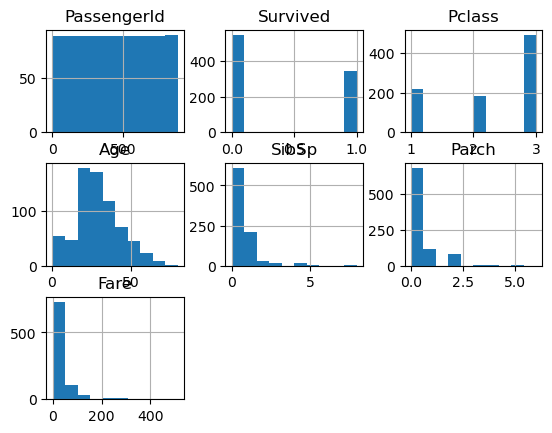

In [11]:
### 10. How is the distribution of each numeric column?
df.hist() 
# for col in df.columns:
#     print(df.dropna()[col].info())

In [12]:
### 11. How many observations are in each category of a categorical column?

print(df.count(axis=0))

# print('answer is ', len(df.index))

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [13]:
### 12. What is the median value of each numeric column?
df.median(numeric_only=True)


PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [14]:
### 13. What is the range of each numeric column?
import numpy as np
# import 

max_series=df.max(axis=0,numeric_only=True)
# print('min of each column :-')
min_series=df.min(axis=0,numeric_only=True)
range_series=max_series.copy(deep=True)
indices_to_remove=[]
for i in range(len(range_series)):
    if not (type(max_series[i])==np.bool_) and not(type(min_series[i])==np.bool_): 
#         range_series.append((max_series[i]-min_series[i]))
        range_series[i]=(max_series[i]-min_series[i])
    else:
        indices_to_remove.append(i)

range_series.drop(labels=[range_series.index[n] for n in indices_to_remove],inplace=True)

# range_series.drop(labels=indices_to_remove,inplace=True)


print(range_series)


PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64


In [15]:
### 14. How many unique values are in each column?

df.nunique(axis=0)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [16]:
## q.15 find standard deviation
std_series=df.std(axis=0,numeric_only=True)
print(std_series)

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64


In [17]:
## q.16 find variance
print(np.square(std_series))
# print(df.var(numeric_only=True))

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64
